<a href="https://colab.research.google.com/github/jefferyssnyder/PyTorch_Tutorial/blob/main/00_pytorch_fundementals_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 00. Pytorch Fundementals

Resource notebook: https://www.learnpytorch.io/00_pytorch_fundamentals/

If there are questions: https://github.com/mrdbourke/pytorch-deep-learning/discussions

In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.0.1+cu118


##Introduction to Tensors
Youtube Explaination:
https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwivjeekhK3_AhU9pokEHS6xCJEQwqsBegQIRBAF&url=https%3A%2F%2Fwww.youtube.com%2Fwatch%3Fv%3Df5liqUk0ZTw&usg=AOvVaw1KW57CM97Uk4c9ywg_gIpf

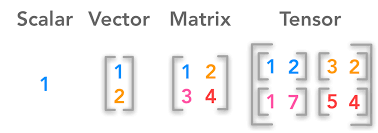

In [ ]:
# Scalar
scalar = torch.tensor(7)
# scalar
# scalar.ndim
scalar.item()

7

In [ ]:
# Vector
vector = torch.tensor([7,7])
# vector
# vector.ndim
vector.shape

torch.Size([2])

In [ ]:
#MATRIX
MATRIX = torch.tensor([[7,8], [9,10]])
# MATRIX
# MATRIX.ndim
MATRIX.shape

torch.Size([2, 2])

In [ ]:
TENSOR = torch.tensor([[[1,2,3],
                        [3,6,9],
                        [2,4,5]]])

# TENSOR.ndim
# TENSOR.shape
TENSOR[0][1]


tensor([3, 6, 9])

### Random Tensors

Why random tensors?
They are important because the way many nueral networks learn is that they start with tensors full of random numbers and adjust those random numbers to better represent the data.

Start with random numbers --> vlook at data --> update random numbers
https://pytorch.org/docs/stable/generated/torch.rand.html

In [ ]:
# Create a random tensor of shape (3,4)

random_tensor = torch.rand(3,4)
random_tensor

tensor([[0.4981, 0.8299, 0.3390, 0.7008],
        [0.5516, 0.7869, 0.3467, 0.2404],
        [0.7601, 0.0416, 0.0678, 0.2403]])

In [ ]:
# Create random tensor similar to the size of an image (height, width, color channels (R,G,B))
random_image_size_tensor = torch.rand(size = (224, 224, 3))
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

### Zeros and Ones

In [ ]:
# Create a tensor of zeros
zero = torch.zeros(size = (3,4))
zero

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
# Create a tensor of ones
ones = torch.ones(size = (3,4))
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

### Create a range of tensors and tensor-lik

In [ ]:
# Use torch.range
one_to_ten = torch.arange(start=1, end=11, step=1)
one_to_ten

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
# Creating tensor-like
ten_zeros = torch.zeros_like(input=one_to_ten)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Tensor Data Types
**Note:** Tensor datatypes is on of the 3 big errors with PyTorch & deep learning

https://en.wikipedia.org/wiki/Precision_(computer_science)
1. Tensors not right datatype - 'tensor.dtype'
2. Tensors not right shape - 'tensor.shape'
3. Tensors no on the right device - 'tensor.device'

In [ ]:
# Float 32 Tensor
float_32_tensor = torch.tensor([3.0,6.0,9.0], 
                               dtype=None, # what datatype is the tensor (e.g. float32 or float16)
                               device=None, # What device is the tensor on
                               requires_grad=False) # Whether or not to track gradients
float_32_tensor


tensor([3., 6., 9.])

In [ ]:
some_tensor = torch.rand(size = (3,4))
# some_tensor
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Device tensor is on a: {some_tensor.device}")

Datatype of tensor: torch.float32
Shape of tensor: torch.Size([3, 4])
Device tensor is on a: cpu


### Manipulating Tensors (tensor operations)
Tensor operations include:


*   Addition
*   Subtraction
*   Multiplication (element-wise)
*   Division
*   Matrix multiplication




In [ ]:
# Create tensor
tensor = torch.tensor([1,2,3])
tensor + 10

tensor([11, 12, 13])

In [ ]:
tensor * 10

tensor([10, 20, 30])

In [ ]:
#  Try PyTorch built-in functions
torch.mul(tensor, 10)

tensor([10, 20, 30])

### Matrix Multiplication

Two main ways of performin multiplication in neural networks and deep learning

1.   Element-wise multiplication
2.   Matrix Multiplication (dot product)


---
https://www.mathsisfun.com/algebra/matrix-multiplying.html

There are 2 main rules that performing matrix multiplication needs to satisfy
1.  The **inner dimensions** must match


*   (3,2) @ (3,2) won't work
*   (2,3) @ (3,2) will work
*   (3,2) @ (2,3) will work

2.The resulting matrix has the shape of the **outer dimensions**:
* (2,3) @ (3,2) -> (2,2)
* (3,2) @ (2,3) -> (3,3)





In [ ]:
torch.matmul(torch.rand(3,10), torch.rand(10,6)).shape

torch.Size([3, 6])

In [ ]:
# Element - wise multiplication

print(tensor, "*", tensor, "=", tensor*tensor)


tensor([1, 2, 3]) * tensor([1, 2, 3]) = tensor([1, 4, 9])


In [ ]:
# Matrix Multiplication
print("Matrix multiplication of ", tensor, "*", tensor, "=", torch.matmul(tensor, tensor))

Matrix multiplication of  tensor([1, 2, 3]) * tensor([1, 2, 3]) = tensor(14)


In [ ]:
# Matrix Multiplucation by hand
1*1 + 2*2 + 3*3


14

In [ ]:
%%time
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
print(value)

tensor(14)
CPU times: user 1.72 ms, sys: 0 ns, total: 1.72 ms
Wall time: 1.73 ms


In [ ]:
%%time
torch.matmul(tensor, tensor)

CPU times: user 81 µs, sys: 13 µs, total: 94 µs
Wall time: 97.3 µs


tensor(14)

### One of the most common errors in deep learning are shape errors

http://matrixmultiplication.xyz/

In [ ]:
# Shapes for matrix multiplications
tensor_A = torch.tensor([[1,2],
                         [3,4],
                         [5,6]])

tensor_B = torch.tensor([[7, 10],
                         [8,11],
                         [9,12]])

# torch.mm(tensor_A, tensor_B) #torch.mm is an alias for torch.matmul # This will error

To fix our tensor shape issues, we can maniplulate the shape of on of our tensors using torch.transpose

A **transpose** switches the axes or dimensions of a given tensor

In [ ]:
tensor_B.T, tensor_B

(tensor([[ 7,  8,  9],
         [10, 11, 12]]),
 tensor([[ 7, 10],
         [ 8, 11],
         [ 9, 12]]))

In [ ]:
# The matrix multiplication operation works when tensor_B is transposed
print(f"Original shapes: tensor_A = {tensor_A.shape}, tensor_B = {tensor_B.shape}")
print(f"New shapes: tensor_A = {tensor_A.shape}, tensor_B.T = {tensor_B.T.shape} \n")

output = torch.mm(tensor_A, tensor_B.T)
print(f"Output:\n {output}")

Original shapes: tensor_A = torch.Size([3, 2]), tensor_B = torch.Size([3, 2])
New shapes: tensor_A = torch.Size([3, 2]), tensor_B.T = torch.Size([2, 3]) 

Output:
 tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])


### Finding the min, max, mean, sum, ect (tensor aggregation)

In [ ]:
# Create a tensor
x = torch.arange(0, 100, 10)
x, x.dtype

(tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]), torch.int64)

In [ ]:
# Find the min
torch.min(x), x.min()

(tensor(0), tensor(0))

In [ ]:
# find the max
torch.max(x), x.max()

(tensor(90), tensor(90))

In [ ]:
# find the mean - note: the torch.mean function requires a tensor of a float32 datatype to work
torch.mean(x.type(torch.float32)), x.type(torch.float32).mean()

(tensor(45.), tensor(45.))

In [ ]:
# find the sum
torch.sum(x), x.sum()

(tensor(450), tensor(450))

In [ ]:
# find the position of the min
torch.argmin(x), x.argmin(), x[0], x[torch.argmin(x)]


(tensor(0), tensor(0), tensor(0), tensor(0))

In [ ]:
# find the position of the max
torch.argmax(x), x.argmax(), x[9], x[torch.argmax(x)]

(tensor(9), tensor(9), tensor(90), tensor(90))

### Reshaping, stacking, squeezing, and unsqueezing tensors
* Reshape - reshapes an input tensor to defined shape
* View - Return a view of an input tensor of certain shape but keep the same memory
* Staking - combining multiple tensors on top of each other (vstack) or side by side (hstack)
* Squeeze - removes all '1' demensions from tensor
* Unsqueeze - add a '1' demension to a target tensor
* Permute - Return a view of the input with demensions permuted( swaped in a certain way)

In [ ]:
# Create tensor
import torch
x = torch.arange(1.,10.)
# x, x.shape

y = torch.arange(3., 30, 3)
y, y.shape

(tensor([ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.]), torch.Size([9]))

In [ ]:
# Add an extra demension
x_reshaped = x.reshape(1,9)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [ ]:
# Change the view
z = x.view(1,9)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [ ]:
# chaning z changing x (bc a view of the tensor shares the same memory as the original target)
z[:,0] = 5
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [ ]:
# Stack tenors on top of others
x_stacked = torch.stack([x, x, y, y], dim=1)
x_stacked


tensor([[ 1.,  1.,  3.,  3.],
        [ 2.,  2.,  6.,  6.],
        [ 3.,  3.,  9.,  9.],
        [ 4.,  4., 12., 12.],
        [ 5.,  5., 15., 15.],
        [ 6.,  6., 18., 18.],
        [ 7.,  7., 21., 21.],
        [ 8.,  8., 24., 24.],
        [ 9.,  9., 27., 27.]])

In [ ]:
# torch.sqeeze() - removes all single demensions from a target tensor
print(f"Previous tensor: {x_reshaped}") 
print(f"Previous shape: {x_reshaped.shape}")

# Remove extra demension from x_shaped
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}") 
print(f"New shape: {x_squeezed.shape}")

Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
Previous shape: torch.Size([1, 9])

New tensor: tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
New shape: torch.Size([9])


In [ ]:
x_reshaped_3_demension = x_reshaped.reshape(1,1,9)
x_reshaped_3_demension, x_reshaped_3_demension.shape

(tensor([[[5., 2., 3., 4., 5., 6., 7., 8., 9.]]]), torch.Size([1, 1, 9]))

In [ ]:
x_reshaped_3_demension.squeeze()

tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])

In [ ]:
#  torch.unsqueeze() - adds a single demension to a target tensor at a specivic dim (demension)
print(f"Prvious target: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

# Add extra demension
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New tensor: {x_unsqueezed.shape}")

Prvious target: tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
Previous shape: torch.Size([9])

New tensor: tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
New tensor: torch.Size([1, 9])


In [ ]:
# torch.permute - rearranges a target tensor in a specified order
x_original = torch.rand(size=(224, 224, 3)) # [height, width, color_channels]

# Permute the original tensor to rearrange the axis (or dim) order
x_permuted = x_original.permute(2, 0, 1) # shifts axis 0->1, 1->2, 2->0

print(f"Previous shape: {x_original.shape}")
print(f"New tensor: {x_permuted.shape}") # [color_channels, height, width]


Previous shape: torch.Size([224, 224, 3])
New tensor: torch.Size([3, 224, 224])


### Indexing (selecting data from tensor)

Indexing with PyTorh is similar to indexing with NumPy

In [ ]:
#  create a tensor
import torch
x = torch.arange(1,10).reshape(1,3,3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [ ]:
# Let's index on the new tensor
x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [ ]:
# Let's index on the middle bracket (dim=1)
x[0][0]


tensor([1, 2, 3])

In [ ]:
# let's index on the morst inner demension (last dimension)
x[0][2][2]

tensor(9)

In [ ]:
# You can use a ':' to select all of the target dimension
x[:,0]

tensor([[1, 2, 3]])

In [ ]:
# Get all of the 0th dim but only 1 of 2nd dim
x[:,:,1]

tensor([[2, 5, 8]])

In [ ]:
# Get all of the 0th dim but only the 1 index of the 1st and 2nd dim
x[:, 1, 1]

tensor([5])

In [ ]:
# Get index 0 of 0th and 1st dim and all the values of the 2nd dim
x[0,0,:]

tensor([1, 2, 3])

In [ ]:
# Index on x to return 9
print(x[0][2][2])

# index on x to return 3,6,9
print(x[:,:,2])

tensor(9)
tensor([[3, 6, 9]])


### PytTorch tensors & NumPy
NumPy is a popular scientific Python numerical computing library.
  And, bc of this, PyTorch has a function to interact with NumPy.

* Data in NumPy, want in Pytorch tensor -> torch.from_numpy(ndarray)
* PyTorch tensor -> NumPy -> torch.Tensor.numpy()


In [ ]:
# NumPy array to tensor
import torch
import numpy as np

array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array) # Warning: when converting from NumPy -> pytorch, pytorch reflects numpy's default datatype of float64 unless specified otherwise
print(f"NumPy's default array datatype is {array.dtype}")
print(f"Tensor's default datatype is {torch.arange(1.0, 8.0).dtype}")
array, tensor

NumPy's default array datatype is float64
Tensor's default datatype is torch.float32


(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [ ]:
# change the vaule of array, what will this do to tensor
array = array +1
array, tensor

(array([2., 3., 4., 5., 6., 7., 8.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [ ]:
# Tensor to numpy array
new_tensor = torch.ones(7)
numpy_tensor = new_tensor.numpy()
new_tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

### Reproducibility (trying to take the random out of randomness)
In short how a network learns:
start with random numbers -> tensor operations -> update random numbers to try and make better representations of the data -> again -> again ->again

To reduce the randomness in neural networks and PyTorch comes the concept of **random seed**.

Essentially what the random seed does is "flavor" the randomness.

*  https://pytorch.org/docs/stable/notes/randomness.html
*  https://en.wikipedia.org/wiki/Random_seed


In [ ]:
import torch
# create 2 random tensors
random_tensor_A = torch.rand(3,4)
random_tensor_B = torch.rand(3,4)

print(random_tensor_A)
print(random_tensor_B)
print(random_tensor_A == random_tensor_B)

tensor([[0.7338, 0.4322, 0.4692, 0.4189],
        [0.1727, 0.8535, 0.9076, 0.4082],
        [0.1377, 0.0839, 0.6715, 0.9070]])
tensor([[0.8399, 0.6707, 0.5115, 0.5043],
        [0.3335, 0.6919, 0.8930, 0.0106],
        [0.6885, 0.3321, 0.6575, 0.0394]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [ ]:
# Lets make random but reproducible tensors

import torch

# Set random seed
RANDOM_SEED = 42

torch.manual_seed(RANDOM_SEED)
random_tensor_C = torch.rand(3,4)

torch.manual_seed(RANDOM_SEED)
random_tensor_D = torch.rand(3,4)

print(random_tensor_C)
print(random_tensor_D)
print(random_tensor_C == random_tensor_D)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


## Running tensors and PyTorch objects on GPUs (and making faster computations)

GPUs = faster computations on numbers, thanks to CUDA + NVIDIA hardware + PyTorch working behind the supports_unicode_filenames

### Getting a GPU (Video time 3:55:00)

1.  Easiest - use Google collab for a free GPU (options to upgrade)
2.  Use your own - takes some setup and the purchase of a GPU
  * https://timdettmers.com/2023/01/30/which-gpu-for-deep-learning/
3.  Use cloud computing - GCP, AWS, Azure

### Changing to GPU in Google Collab
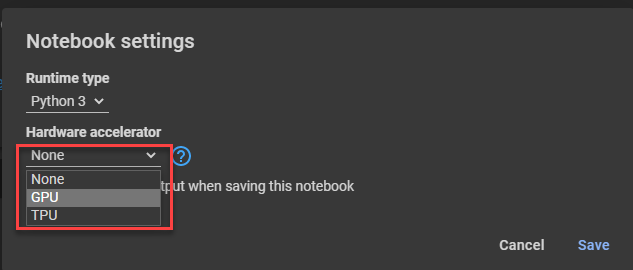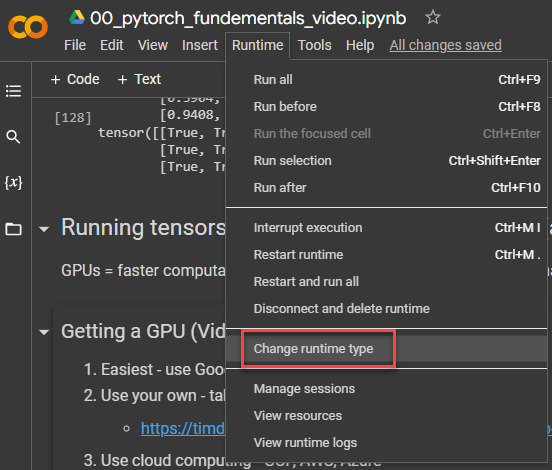



In [ ]:
# check for GPU access with PyTorch (Video Time 4:00:00)
import torch
!nvidia-smi
print(f"Is the GPU available? -  {torch.cuda.is_available()}")
print(f"The count of GPUs available: {torch.cuda.device_count()}")

Wed Jun  7 14:50:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

For PyTorch, since it's capable of running on compute om the GPU or CPU, it's best practise to setup device agnostic code:
*  Best practices: https://pytorch.org/docs/stable/notes/cuda.html#best-practices

e.g., run on GPU if available, otherwise default to CPU

In [ ]:
# Set up device agnostic code
device = "cuda" if torch.cuda. is_available() else "cpu"

### 3. Put tensors (and models) on the GPU
The reason we want our tensors/models on the the GPU is bc usinf a GPU results in fast computations

In [ ]:
# Create a tensor (default is on CPU)
gpu_cpu_tensor1 = torch.tensor([1,2,3], device="cpu")
gpu_cpu_tensor2 = torch.tensor([1,2,3])

#Tensor not on GPU
print(f"Tesnor created with processor specificed: {gpu_cpu_tensor1}, {gpu_cpu_tensor1.device}")
print(f"Tensor created without processor specified: {gpu_cpu_tensor2}, {gpu_cpu_tensor2.device}")

Tesnor created with processor specificed: tensor([1, 2, 3]), cpu
Tensor created without processor specified: tensor([1, 2, 3]), cpu


In [ ]:
# Move tensor to GPU if available (Video time 4:08:00)
tensor_to_gpu = gpu_cpu_tensor1.to(device)
tensor_to_gpu

tensor([1, 2, 3], device='cuda:0')

### 4. Moving tensors back to CPU

In [ ]:
# If tensor is on GPU, can't transform it to NumPy
# tensor_to_gpu.numpy() # this will error our

TypeError: ignored

In [ ]:
# To fix the GPU tensor with NumPy issue, we can first set it to CPU
tensor_back_to_cpu = tensor_to_gpu.cpu().numpy()
print(f"This is the new tensor on a CPU: {tensor_back_to_cpu}")
print(f"The tensor assigned to GPU still exists: {tensor_to_gpu}")

This is the new tensor on a CPU: [1 2 3]
The tensor assigned to GPU still exists: tensor([1, 2, 3], device='cuda:0')


### **For additional exercises go here** (Video time 4:12:00)
* https://www.learnpytorch.io/00_pytorch_fundamentals/#exercises